- Reference

https://www.kaggle.com/code/raghavkachroo/supreme-court-judgement-prediction/notebook

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
from pathlib import Path

path = Path(os.getcwd() + '/datasets')

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
train = pd.read_csv(path / 'train.csv')
test = pd.read_csv(path / 'test.csv')
submission = pd.read_csv(path / 'sample_submission.csv')

In [5]:
train.head()

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana. During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union. Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. \nThompson successfully sued St. Amant for defamation. Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with “malice.” Thompson then appealed to the Supreme Court of Louisiana. That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true. Finally, that court held that the First Amendment protects uninhibited, robust debate, rather than an open season to shoot down the good name of anyone who happens to be a public servant. \n",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,"Ramon Nelson was riding his bike when he suffered a lethal blow to the back of his head with a baseball bat. After two eyewitnesses identified Lawrence Owens from an array of photos and then a lineup, he was tried and convicted for Nelson’s death. Because Nelson was carrying cocaine and crack cocaine potentially for distribution, the judge at Owens’ bench trial ruled that Owens was probably also a drug dealer and was trying to “knock [Nelson] off.” Owens was found guilty of first-degree murder and sentenced to 25 years in prison.\nOwens filed a petition for a writ of habeas corpus on the grounds that his constitutional right to due process was violated during the trial. He argued that the eyewitness identification should have been inadmissible based on unreliability and that the judge impermissibly inferred a motive when a motive was not an element of the offense. The district court denied the writ of habeas corpus, and Owens appealed. The U.S. Court of Appeals for the Seventh Circuit reversed the denial and held that the trial judge’s inference about Owens’s motive violated his right to have his guilt adjudicated solely based on the evidence presented at trial.\n",0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.","An Alabama state court convicted Billy Joe Magwood of murder and sentenced him to death. Subsequently, an Alabama federal district court partially granted Mr. Magwood's petition for federal habeas corpus relief. The court upheld his conviction but instructed the state court to look at mitigating evidence when resentencing Mr. Magwood. Upon resentencing, the state court sentenced Mr. Magwood to death once again. Mr. Magwood filed a second petition for federal habeas corpus relief with the federal district court arguing that a judicial rule was retroactively applied in his case and that he lacked effective counsel at sentencing. The district court granted the petition and vacated Mr. Magwood's death sentence.\nOn appeal, the U.S. Court of Appeals for the Eleventh circuit reversed, holding that prisoners may not raise challenges to an original sentence that could have been raised in an earlier petition. The court also held that Mr. Magwood's counsel was not ineffective because he failed to raise an argument that had already been decided by the state's highest court adverse to his client's position.\n",1
3,TRAIN_0003,Linkletter,Walker,"Victor Linkletter was convicted in state court on evidence illegally obtained by police prior to the Supreme Court decision concerning the Fourth Amendment in Mapp v. Ohio. Mapp applied the exclusionary rule to state criminal proceedings, denying the use of illegally obtained evidence at trial. Linkletter argued for a retrial based on the Mapp decision.\n"

In [6]:
test.head()

,ID,first_party,second_party,facts
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal courts to detain an arrestee prior to trial if the government could prove that the individual was potentially dangerous to other people in the community. Prosecutors alleged that Salerno and another person in this case were prominent figures in the La Cosa Nostra crime family.\n
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.","Lexecon Inc. was a defendant in a class action lawsuit. Under 28 USC section 1407(a), the lawsuit was transferred for pretrial proceedings to the District of Arizona. Section 1407(a) authorizes the Judicial Panel on Multidistrict Litigation to transfer civil actions with common issues of fact ""to any district for coordinated or consolidated pretrial proceedings,"" but provides that the Panel ""shall"" remand any such action to the original district ""at or before the conclusion of such pretrial proceedings."" After claims against it were dismissed, Lexecon brought suit against Milberg Weiss Bershad Hynes & Lerach and others (Milberg) in the class action lawsuit in the Northern District of Illinois. Ultimately, the Panel, under section 1407(a), ordered the case transferred to the District of Arizona. Afterwards, Lexecon moved for the Arizona District Court to remand the case to Illinois. Milberg filed a countermotion requesting the Arizona District Court to invoke section 1404(a) to ""transfer"" the case to itself for trial.Ultimately, the court assigned the case to itself and the Court of Appeals affirmed its judgment.\n"
2,TEST_0002,"No. 07-582\t Title: \t Federal Communications Commission, et al.","Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broadcast the Billboard Music Awards, an annual program honoring top-selling musicians. During the broadcasts, one musician used an explicative in his acceptance speech, and a presenter used two expletives. The Federal Communications Commission (FCC), although it had previously taken the position that such fleeting and isolated expletives did not violate its indecency regime, issued notices of liability to Fox for broadcasting the profane language. The FCC argued that previous decisions referring to ""fleeting"" expletives were merely staff letters and dicta and did not accurately represent its position on the matter. Fox appealed the FCC sanctions to the U.S. Court of Appeals for the Second Circuit.\nThe Second Circuit held that the FCC's liability order was ""arbitrary and capricious"" under the governing Administrative Procedure Act because the FCC had completely reversed its position on fleeting expletives without giving a proper justification. The Second Circuit also failed to find any evidence that the expletives were harmful.\n"
3,TEST_0003,Harold Kaufman,United States,"During his trial for armed robbery of a federally insured savings and loan association, Harold Kaufman admitted to the crime but unsuccessfully claimed insanity. He was convicted and the U.S. Court of Appeals for the Eighth Circuit affirmed. Kaufman then filed a post-conviction motion in district court challenging the evidence that proved his sanity. He alleged that the evidence was unlawfully seized in violation of the Fourth Amendment. The district court denied relief, holding that unlawful search and seizure was not an available attack in post-conviction proceedings. The Eighth Circuit affirmed.\n"
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant authorizing the search of Paul and Erma Berger's Montana ranch for evidence of the taking of wildlife in violation of federal law. Later, a multiple-vehicle caravan consisting of government agents and a crew of photographers and reporters from CNN proceeded to the ranch. In executing the warrant, the federal officers allowed the media crew to accompany and observe them. Subsequently, the Berger's filed suit, asserting that the officials, special agents of 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts               2478 non-null   object
 4   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 96.9+ KB


In [7]:
train.isnull().sum()

ID                    0
first_party           0
second_party          0
facts                 0
first_party_winner    0
dtype: int64

## Seperate Datasets

In [7]:
df_target = train[['first_party_winner']]

In [8]:
df_nlp = train[['facts', 'first_party', 'second_party']]

## Data Cleaning

In [9]:
import re
import nltk

In [10]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [11]:
lst_meaningless = [
    'et',
    'al',
    'inc',
    'llc',
    'co',
    'corp',
]

In [12]:
#corpus = df_nlp
#lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

In [13]:
ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()

In [14]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    
    ## clean (convert to lowercase and remove punctuations, characters and numbers then strip)
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]

    ## Remove meaningless words
    if lst_meaningless is not None:
        lst_text = [word for word in lst_text if word not in lst_meaningless]

    ## Remove one lenght words:
    lst_text = [word for word in lst_text if len(word) >= 2]
        
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [15]:
df_nlp["first_party_clean"] = df_nlp["first_party"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

/var/folders/fb/tsylykvd63d8k25rnpzpj6bc0000gn/T/ipykernel_56658/297067528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp["first_party_clean"] = df_nlp["first_party"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))


In [16]:
df_nlp["first_party_clean"]

0                            phil st amant
1                           stephen duncan
2                        billy joe magwood
3                               linkletter
4                       william earl fikes
                       ...                
2473       hollyfrontier cheyenne refining
2474          grupo mexicano de desarrollo
2475                               peguero
2476    immigration naturalization service
2477                               markman
Name: first_party_clean, Length: 2478, dtype: object

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
l = []

for i in range(len(df_nlp["first_party_clean"])):
    l.extend(df_nlp["first_party_clean"].iloc[i].split())

[Text(0, 0.5, '')]

<Figure size 10000x10000 with 0 Axes>

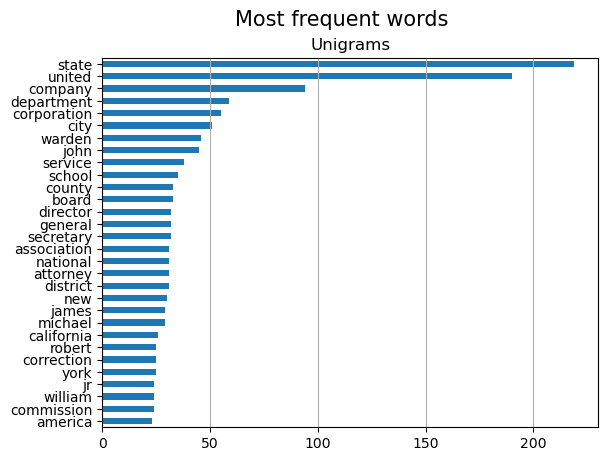

In [19]:
lst_tokens = l

plt.figure(figsize=(100, 100))
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
## unigrams

dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax, 
                  legend=False).grid(axis='x')
ax.set(ylabel=None)

In [20]:
test["first_party_clean"] = test["first_party"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

In [21]:
test["first_party_clean"]

0                                             salerno
1                    milberg wei bershad hynes lerach
2              title federal communication commission
3                                      harold kaufman
4                                              berger
                            ...                      
1235                           haitian center council
1236                                          whitman
1237                        linda matteo john madigan
1238    washington state apple advertising commission
1239                                 theodore stovall
Name: first_party_clean, Length: 1240, dtype: object

In [22]:
l = []

for i in range(len(test["first_party_clean"])):
    l.extend(test["first_party_clean"].iloc[i].split())

In [23]:
l

['salerno',
 'milberg',
 'wei',
 'bershad',
 'hynes',
 'lerach',
 'title',
 'federal',
 'communication',
 'commission',
 'harold',
 'kaufman',
 'berger',
 'air',
 'line',
 'pilot',
 'association',
 'traffic',
 'stream',
 'bvi',
 'infrastructure',
 'ltd',
 'nrg',
 'power',
 'marketing',
 'united',
 'state',
 'united',
 'state',
 'catholic',
 'conference',
 'bobby',
 'lee',
 'holmes',
 'department',
 'agriculture',
 'centennial',
 'saving',
 'bank',
 'fsb',
 'umbehr',
 'unum',
 'life',
 'insurance',
 'company',
 'america',
 'saffold',
 'united',
 'state',
 'national',
 'organization',
 'woman',
 'marmet',
 'health',
 'care',
 'center',
 'walter',
 'rothgery',
 'federal',
 'power',
 'commission',
 'wallstreetcom',
 'united',
 'state',
 'patent',
 'trademark',
 'office',
 'lonnie',
 'lee',
 'burton',
 'american',
 'trucking',
 'association',
 'jerry',
 'weast',
 'superintendent',
 'montgomery',
 'county',
 'public',
 'school',
 'cowpasture',
 'river',
 'association',
 'estate',
 'ahmad',
 

[Text(0, 0.5, '')]

<Figure size 10000x10000 with 0 Axes>

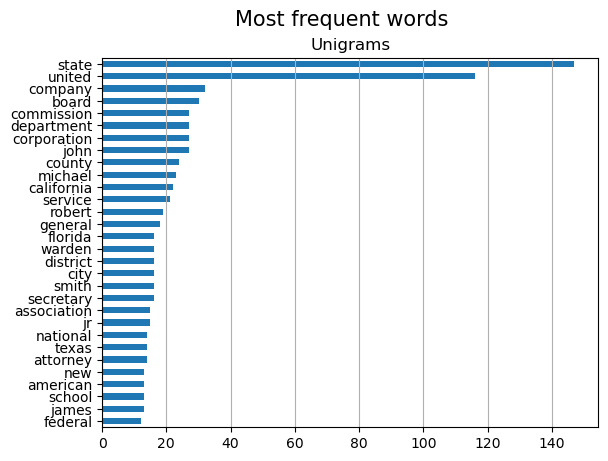

In [24]:
lst_tokens = l

plt.figure(figsize=(100, 100))
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
## unigrams

dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax, 
                  legend=False).grid(axis='x')
ax.set(ylabel=None)

In [25]:
df_nlp["facts_clean"] = df_nlp["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
df_nlp["first_party_clean"] = df_nlp["first_party"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
df_nlp["second_party_clean"] = df_nlp["second_party"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

In [26]:
df_nlp.head(3)

,facts,first_party,second_party,first_party_clean,facts_clean,second_party_clean
0,"On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana. During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union. Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. \nThompson successfully sued St. Amant for defamation. Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with “malice.” Thompson then appealed to the Supreme Court of Louisiana. That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true. Finally, that court held that the First Amendment protects uninhibited, robust debate, rather than an open season to shoot down the good name of anyone who happens to be a public servant. \n",Phil A. St. Amant,Herman A. Thompson,phil st amant,june phil st amant candidate public office made television speech baton rouge louisiana speech st amant accused political opponent communist involved criminal activity head local teamster union finally st amant implicated herman thompson east baton rouge deputy sheriff scheme move money teamster union st amants political opponent thompson successfully sued st amant defamation louisiana first circuit court appeal reversed holding thompson show st amant acted malice thompson appealed supreme court louisiana court held although public figure forfeit first amendment protection defamation st amant accused thompson crime utter disregard whether remark true finally court held first amendment protects uninhibited robust debate rather open season shoot good name anyone happens public servant,herman thompson
1,"Ramon Nelson was riding his bike when he suffered a lethal blow to the back of his head with a baseball bat. After two eyewitnesses identified Lawrence Owens from an array of photos and then a lineup, he was tried and convicted for Nelson’s death. Because Nelson was carrying cocaine and crack cocaine potentially for distribution, the judge at Owens’ bench trial ruled that Owens was probably also a drug dealer and was trying to “knock [Nelson] off.” Owens was found guilty of first-degree murder and sentenced to 25 years in prison.\nOwens filed a petition for a writ of habeas corpus on the grounds that his constitutional right to due process was violated during the trial. He argued that the eyewitness identification should have been inadmissible based on unreliability and that the judge impermissibly inferred a motive when a motive was not an element of the offense. The district court denied the writ of habeas corpus, and Owens appealed. The U.S. Court of Appeals for the Seventh Circuit reversed the denial and held that the trial judge’s inference about Owens’s motive violated his right to have his guilt adjudicated solely based on the evidence presented at trial.\n",Stephen Duncan,Lawrence Owens,stephen duncan,ramon nelson riding bike suffered lethal blow back head baseball bat two eyewitness identified lawrence owen array photo lineup tried convicted nelson death nelson carrying cocaine crack cocaine potentially distribution judge owen bench trial ruled owen probably also drug dealer trying knock nelson owen found guilty firstdegree murder sentenced year prison owen filed petition writ habeas corpus ground constitutional right due process violated trial argued eyewitness identification inadmissible based unreliability judge impermissibly inferred motive motive element offense district court denied writ habeas corpus owen appealed u court appeal seventh circuit reversed denial held trial judge inference owens motive violated righ

In [27]:
test_nlp = test[['first_party', 'second_party', 'facts']]

In [28]:
test_nlp["facts_clean"] = test_nlp["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
test_nlp["first_party_clean"] = test_nlp["first_party"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
test_nlp["second_party_clean"] = test_nlp["second_party"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

/var/folders/fb/tsylykvd63d8k25rnpzpj6bc0000gn/T/ipykernel_56658/1394225691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_nlp["facts_clean"] = test_nlp["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))


In [29]:
test_nlp.head()

,first_party,second_party,facts,facts_clean,first_party_clean,second_party_clean
0,Salerno,United States,The 1984 Bail Reform Act allowed the federal courts to detain an arrestee prior to trial if the government could prove that the individual was potentially dangerous to other people in the community. Prosecutors alleged that Salerno and another person in this case were prominent figures in the La Cosa Nostra crime family.\n,bail reform act allowed federal court detain arrestee prior trial government could prove individual potentially dangerous people community prosecutor alleged salerno another person case prominent figure la cosa nostra crime family,salerno,united state
1,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.","Lexecon Inc. was a defendant in a class action lawsuit. Under 28 USC section 1407(a), the lawsuit was transferred for pretrial proceedings to the District of Arizona. Section 1407(a) authorizes the Judicial Panel on Multidistrict Litigation to transfer civil actions with common issues of fact ""to any district for coordinated or consolidated pretrial proceedings,"" but provides that the Panel ""shall"" remand any such action to the original district ""at or before the conclusion of such pretrial proceedings."" After claims against it were dismissed, Lexecon brought suit against Milberg Weiss Bershad Hynes & Lerach and others (Milberg) in the class action lawsuit in the Northern District of Illinois. Ultimately, the Panel, under section 1407(a), ordered the case transferred to the District of Arizona. Afterwards, Lexecon moved for the Arizona District Court to remand the case to Illinois. Milberg filed a countermotion requesting the Arizona District Court to invoke section 1404(a) to ""transfer"" the case to itself for trial.Ultimately, the court assigned the case to itself and the Court of Appeals affirmed its judgment.\n",lexecon defendant class action lawsuit usc section lawsuit transferred pretrial proceeding district arizona section authorizes judicial panel multidistrict litigation transfer civil action common issue fact district coordinated consolidated pretrial proceeding provides panel shall remand action original district conclusion pretrial proceeding claim dismissed lexecon brought suit milberg wei bershad hynes lerach others milberg class action lawsuit northern district illinois ultimately panel section ordered case transferred district arizona afterwards lexecon moved arizona district court remand case illinois milberg filed countermotion requesting arizona district court invoke section transfer case trialultimately court assigned case court appeal affirmed judgment,milberg wei bershad hynes lerach,lexecon
2,"No. 07-582\t Title: \t Federal Communications Commission, et al.","Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broadcast the Billboard Music Awards, an annual program honoring top-selling musicians. During the broadcasts, one musician used an explicative in his acceptance speech, and a presenter used two expletives. The Federal Communications Commission (FCC), although it had previously taken the position that such fleeting and isolated expletives did not violate its indecency regime, issued notices of liability to Fox for broadcasting the profane language. The FCC argued that previous decisions referring to ""fleeting"" expletives were merely staff letters and dicta and did not accurately represent its position on the matter. Fox appealed the FCC sanctions to the U.S. Court of Appeals for the Second Circuit.\nThe Second Circuit held that the FCC's liability order was ""arbitrary and capricious"" under the governing Administrative Procedure Act because the FCC had completely reversed its position on fleeting expletives without giving a proper justification. The Second Circuit also failed to find any evidence that the expletives were harmful.\n",fox television station broadcast billboard music award annual program honoring topselling musician bro

## Model Tuning

## LR

### Feature

## Congratulation!!!

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=4
)

In [31]:
def get_vector(vectorizer, df, train_mode):
    if train_mode:
        X_facts = vectorizer.fit_transform(df['facts_clean'])
    else:
        X_facts = vectorizer.transform(df['facts_clean'])
    X_party1 = vectorizer.transform(df['first_party_clean'])
    X_party2 = vectorizer.transform(df['second_party_clean'])
    
    X = np.concatenate([X_party1.todense(), X_party2.todense(), X_facts.todense()], axis=1)
    return np.asarray(X)

In [32]:
X = get_vector(vectorizer, df_nlp, True)
Y = train["first_party_winner"]
X_test = get_vector(vectorizer, test_nlp, False)

In [37]:
model = LogisticRegression()
model.fit(X, Y)

LogisticRegression()

In [38]:
pred = model.predict(X_test)

In [40]:
submission['first_party_winner'] = pred
submission.to_csv('./baseline_with_preprocessing.csv', index=False)
print('Done')

Done


## BEST SCORE!!!!

## Combination

- Model
    - Logistic Regression
        - no Hyper Params. settings
        - train Whole data
- Feature
    - Data Cleansing <- NLP approach
    - TFIDF
        - with n_gram(1,2)
        - min_df 4

In [33]:
from sklearn.model_selection import train_test_split

In [202]:
# # Perform an 80-20 split for training and testing data
X_train, X_val, y_train, y_val = train_test_split(
    X,
    Y,
    test_size=0.2,
    stratify=train['first_party_winner'],
    random_state=144
)

In [203]:
X_train.shape

(1982, 29388)

### Modeling

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [204]:
lr = LogisticRegression()

In [209]:
lr_params = {
    'C':[0.1, 0.5, 1.0],
    'max_iter':[800, 900, 1000],
    'solver':['lbfgs'],
}

In [210]:
grid_cv_lr = GridSearchCV(estimator=lr,
                       param_grid=lr_params,
                       scoring='accuracy',
                       cv=10)

grid_cv_lr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1.0], 'max_iter': [800, 900, 1000],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [211]:
print('최적 하이퍼파라미터:', grid_cv_lr.best_params_)

최적 하이퍼파라미터: {'C': 0.1, 'max_iter': 800, 'solver': 'lbfgs'}


In [212]:
model = grid_cv_lr.best_estimator_
grid_cv_lr_pred = model.predict(X_val)
score = accuracy_score(y_val, grid_cv_lr_pred);
print(f"Accuracy: {score:.4f}")

Accuracy: 0.6613


In [213]:
y_train_pred = model.predict(X_train)
y_val_pred = grid_cv_lr_pred

print('LR - Train\n', classification_report(y_train, y_train_pred, zero_division=0))
print('LR - Val\n', classification_report(y_val, y_val_pred, zero_division=0))

LR - Train
               precision    recall  f1-score   support

           0       0.94      0.02      0.05       663
           1       0.67      1.00      0.80      1319

    accuracy                           0.67      1982
   macro avg       0.81      0.51      0.42      1982
weighted avg       0.76      0.67      0.55      1982

LR - Val
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       166
           1       0.66      0.99      0.80       330

    accuracy                           0.66       496
   macro avg       0.33      0.50      0.40       496
weighted avg       0.44      0.66      0.53       496



In [194]:
y_train_pred = model.predict(X_train)
y_val_pred = grid_cv_lr_pred

print('LR - Train\n', classification_report(y_train, y_train_pred, zero_division=0))
print('LR - Val\n', classification_report(y_val, y_val_pred, zero_division=0))

LR - Train
               precision    recall  f1-score   support

           0       0.96      0.03      0.07       663
           1       0.67      1.00      0.80      1319

    accuracy                           0.68      1982
   macro avg       0.82      0.52      0.44      1982
weighted avg       0.77      0.68      0.56      1982

LR - Val
               precision    recall  f1-score   support

           0       0.75      0.02      0.04       166
           1       0.67      1.00      0.80       330

    accuracy                           0.67       496
   macro avg       0.71      0.51      0.42       496
weighted avg       0.70      0.67      0.54       496



In [195]:
pred_lr = model.predict(X_test)

submission['first_party_winner'] = pred_lr
submission.to_csv('./feat_engineer+n_gram+LR.csv', index=False)
print('Done')

Done


## RF

### Feature

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    ngram_range=(1,4),
    min_df=4,
    max_features=4000,
)

In [215]:
def get_vector(vectorizer, df, train_mode):
    if train_mode:
        X_facts = vectorizer.fit_transform(df['facts_clean'])
    else:
        X_facts = vectorizer.transform(df['facts_clean'])
    X_party1 = vectorizer.transform(df['first_party_clean'])
    X_party2 = vectorizer.transform(df['second_party_clean'])
    
    X = np.concatenate([X_party1.todense(), X_party2.todense(), X_facts.todense()], axis=1)
    return np.asarray(X)

In [216]:
X = get_vector(vectorizer, df_nlp, True)
Y = train["first_party_winner"]
X_test = get_vector(vectorizer, test_nlp, False)

In [217]:
# # Perform an 80-20 split for training and testing data
X_train, X_val, y_train, y_val = train_test_split(
    X,
    Y,
    test_size=0.2,
    stratify=train['first_party_winner'],
    random_state=144
)

In [218]:
X_train.shape

(1982, 12000)

### Modeling

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
rf = RandomForestClassifier()

In [225]:
lr_params = {
    'n_estimators':[500, 1000],
    'max_depth':[15, 20],
}

In [226]:
grid_cv_rf = GridSearchCV(estimator=rf,
                       param_grid=lr_params,
                       scoring='accuracy',
                       cv=10)

grid_cv_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 20], 'n_estimators': [500, 1000]},
             scoring='accuracy')

In [227]:
print('최적 하이퍼파라미터:', grid_cv_rf.best_params_)

최적 하이퍼파라미터: {'max_depth': 15, 'n_estimators': 500}


In [228]:
model = grid_cv_rf.best_estimator_
grid_cv_rf_pred = model.predict(X_val)
score = accuracy_score(y_val, grid_cv_rf_pred);
print(f"Accuracy: {score:.4f}")

Accuracy: 0.6653


In [229]:
y_train_pred = model.predict(X_train)
y_val_pred = grid_cv_rf_pred

print('RF - Train\n', classification_report(y_train, y_train_pred, zero_division=0))
print('RF - Val\n', classification_report(y_val, y_val_pred, zero_division=0))

RF - Train
               precision    recall  f1-score   support

           0       1.00      0.05      0.10       663
           1       0.68      1.00      0.81      1319

    accuracy                           0.68      1982
   macro avg       0.84      0.53      0.45      1982
weighted avg       0.79      0.68      0.57      1982

RF - Val
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       166
           1       0.67      1.00      0.80       330

    accuracy                           0.67       496
   macro avg       0.33      0.50      0.40       496
weighted avg       0.44      0.67      0.53       496



In [230]:
pred_rf = model.predict(X_test)

submission['first_party_winner'] = pred_rf
submission.to_csv('./feat_engineer+n_gram+RF.csv', index=False)
print('Done')

Done
